In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

Using TensorFlow backend.


In [4]:
# Set up data augmentation for train and validation dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\hp\Desktop\Caps Dataset\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    r"C:\Users\hp\Desktop\Caps Dataset\val",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 3250 images belonging to 13 classes.
Found 325 images belonging to 13 classes.


In [5]:
# Create MobileNet model with pre-trained weights on ImageNet
base_model = MobileNet(weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\hp\AppData\Roaming\Python\Python36\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [6]:
# Add new layers for our classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)

predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [7]:
# Set up new model with the added layers
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
# Freeze the pre-trained layers so they are not trained
for layer in base_model.layers:
    layer.trainable = False

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Fit the model
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
101/101 [==============================] - 157s 2s/step - loss: 1.0758 - acc: 0.6324 - val_loss: 1.2658 - val_acc: 0.5375
Epoch 2/20
101/101 [==============================] - 148s 1s/step - loss: 0.6338 - acc: 0.7858 - val_loss: 1.2378 - val_acc: 0.5939
Epoch 3/20
101/101 [==============================] - 146s 1s/step - loss: 0.4982 - acc: 0.8324 - val_loss: 1.3061 - val_acc: 0.5768
Epoch 4/20
101/101 [==============================] - 156s 2s/step - loss: 0.5027 - acc: 0.8304 - val_loss: 1.5136 - val_acc: 0.5119
Epoch 5/20
101/101 [==============================] - 152s 2s/step - loss: 0.4356 - acc: 0.8567 - val_loss: 1.8627 - val_acc: 0.5188
Epoch 6/20
101/101 [==============================] - 154s 2s/step - loss: 0.4073 - acc: 0.8701 - val_loss: 1.4384 - val_acc: 0.5973
Epoch 7/20
101/101 [==============================] - 147s 1s/step - loss: 0.3558 - acc: 0.8783 - val_loss: 1.5746 - val_acc: 0.5802
Epoch 8/20
101/101 [=

In [11]:
# Evaluate the model on the test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    r"C:\Users\hp\Desktop\Caps Dataset\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.n // test_generator.batch_size)
print('Test accuracy:', test_acc)

Found 325 images belonging to 13 classes.
Test accuracy: 0.60625


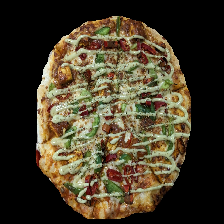

In [12]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\testing\test seg\p20.jpg", target_size=(224, 224))
img

In [13]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [14]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

In [15]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: Pizza


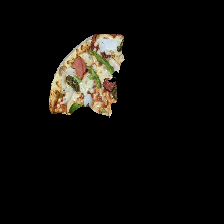

In [16]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\testing\test seg\p13.jpg", target_size=(224, 224))
img

In [17]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [18]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

In [19]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: Fried Rice


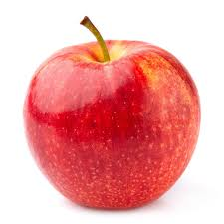

In [24]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\testing\apple.jpeg", target_size=(224, 224))
img

In [25]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [26]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

In [27]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: Apple


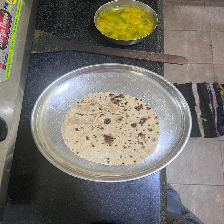

In [35]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\testing\roti.jpeg", target_size=(224, 224))
img

In [36]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [37]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

In [38]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: Carrot


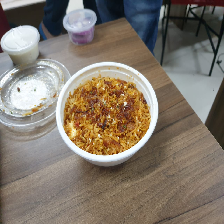

In [49]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\testing\fried.jpeg", target_size=(224, 224))
img

In [50]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [51]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

In [52]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: Orange


In [ ]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\b30.jpg", target_size=(224, 224))
img

In [ ]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

In [ ]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

In [ ]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\tom.jpg", target_size=(224, 224))
img

In [ ]:
import numpy as np
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

In [ ]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

In [ ]:
model.save(r"C:\Users\hp\Desktop\ResNet 101\MobileNet.h5")